##### 3、如何用python加载数据 →字典+列表的存储方式
1)成功 读取商铺数据.csv
文件
2）解析数据，存成列表字典格式：[{'var1':value1,'var2':value2,'var3':value3...},...,{}]
3)数据清洗：
- comment，point两个字段清洗成数字
- 清楚字段缺失的数据
- commentlist拆分成3个字段，并且清洗成数字


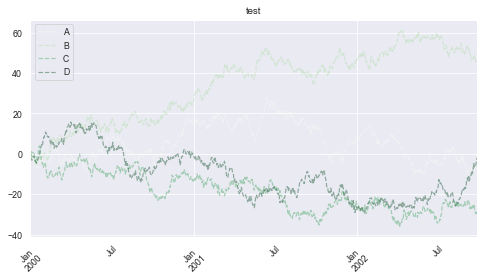

In [3]:
#读取数据

f= open('','r',encoding='utf-8')
for i in